In [12]:
work_dir = '/Volumes/Xiguagua/kaggle/doodle/'

train_dir = '/Volumes/Xiguagua/kaggle/doodle/origin/train_simplified/'

In [14]:
ls $train_dir

The Eiffel Tower.csv*        light bulb.csv*
The Great Wall of China.csv* lighthouse.csv*
The Mona Lisa.csv*           lightning.csv*
airplane.csv*                line.csv*
alarm clock.csv*             lion.csv*
ambulance.csv*               lipstick.csv*
angel.csv*                   lobster.csv*
animal migration.csv*        lollipop.csv*
ant.csv*                     mailbox.csv*
anvil.csv*                   map.csv*
apple.csv*                   marker.csv*
arm.csv*                     matches.csv*
asparagus.csv*               megaphone.csv*
axe.csv*                     mermaid.csv*
backpack.csv*                microphone.csv*
banana.csv*                  microwave.csv*
bandage.csv*                 monkey.csv*
barn.csv*                    moon.csv*
baseball bat.csv*            mosquito.csv*
baseball.csv*                motorbike.csv*
basket.csv*                  mountain.csv*
basketball.csv*              mouse.csv*
bat.csv*                     moustache.csv*
bathtub.csv*                

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from concurrent.futures import ThreadPoolExecutor
import cv2
import shutil
import PIL
import ast

from fastai import *
from fastai.vision import *

In [16]:
def get_counts(path): return (path.stem, pd.read_csv(path).shape[0])

In [19]:
get_counts(Path(train_dir)/'hand.csv')

('hand', 291773)

In [21]:
%%time 
with ThreadPoolExecutor(4) as e: counts = list(e.map(get_counts, Path(train_dir).iterdir()))

CPU times: user 5min 43s, sys: 55.4 s, total: 6min 39s
Wall time: 6min 3s


In [28]:
sorted_counts = sorted(counts, key=lambda tup: tup[1])

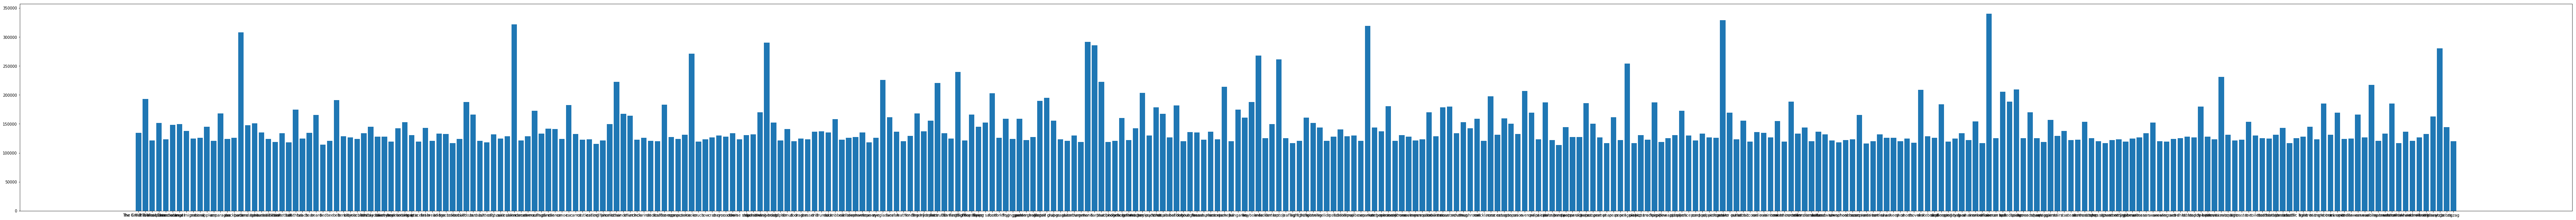

In [27]:
plt.bar([tup[0] for tup in sorted_counts], [tup[1] for tup in sorted_counts])
# plt.xticks(ticks=[], rotation='vertical')
fig = plt.gcf()
fig.set_size_inches(120, 10)

In [30]:
np.sum([tup[1] for tup in counts]), len(counts)

(49707579, 340)

In [37]:
df = pd.read_csv(Path(train_dir)/'angel.csv')

In [38]:
df.head()

,countrycode,drawing,key_id,recognized,timestamp,word
0,US,"[[[93, 103, 104, 139, 140, 149, 84], [174, 111...",5864802511486976,False,2017-03-13 15:30:54.822430,angel
1,US,"[[[128, 116, 99, 87, 77, 75, 80, 90, 114, 130,...",6665588124418048,True,2017-03-03 20:39:08.851890,angel
2,JP,"[[[98, 74, 52, 46, 44, 52, 63, 82, 116, 137, 1...",5275268287561728,True,2017-03-05 05:52:48.496610,angel
3,SE,"[[[140, 153, 174, 183, 210, 224, 227, 228, 221...",5492710351831040,True,2017-03-16 15:26:18.807790,angel
4,KR,"[[[77, 60, 42, 37, 36, 52, 89, 133, 141, 141, ...",6163600517365760,True,2017-03-23 15:07:45.499330,angel


In [34]:
BASE_SIZE = 256
def draw_cv2(raw_strokes, size=256, lw=4, time_color=False):
    img = np.zeros((BASE_SIZE, BASE_SIZE), np.uint8)
    for t, stroke in enumerate(raw_strokes):
        for i in range(len(stroke[0]) - 1):
            color = 255 - min(t, 10) * 13 if time_color else 255
            _ = cv2.line(img, (stroke[0][i], stroke[1][i]),
                         (stroke[0][i + 1], stroke[1][i + 1]), color, lw)
    img = cv2.copyMakeBorder(img,4,4,4,4,cv2.BORDER_CONSTANT)
    if size != BASE_SIZE:
        return cv2.resize(img, (size, size), interpolation=cv2.INTER_LINEAR)
    else:
        return img

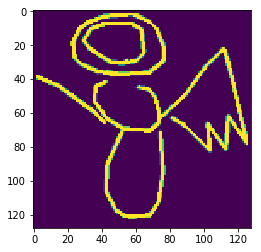

In [43]:
plt.imshow(draw_cv2(ast.literal_eval(df.loc[2, 'drawing']), size=128))

In [51]:
np_img = draw_cv2(ast.literal_eval(df.loc[2, 'drawing']), size=128)

In [54]:
PIL.Image.fromarray(np_img).save(Path(train_dir)/'angel.png')

In [59]:
PIL.Image.open(Path(train_dir)/'angel.png')

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/Xiguagua/kaggle/doodle/origin/train_simplified/angel.png'

In [58]:
import os
os.remove(Path(train_dir)/'angel.png')

In [60]:
Path(train_dir).ls()

AttributeError: 'PosixPath' object has no attribute 'ls'